# <font color="#FF80FF"> Prática 01: Regressão Linear - Renda Média Brasileira </font>

**Objetivos:**


*   Implementar o algoritmo de Regressão Linear
*   Fixar o conceito de regressão sobre dados e seus uso para previsão

**Requisitos de execução:**


*   Upload do arquivo *read_series.py*
*   Criar o diretório *data* e upload do arquivo *renda_Brasil_2012_2020.csv* neste diretório

**Atividade 1:**

Leia a série temporal das rendas médias das famílias brasileiras contidas no arquivo *renda_Brasil_2012_2020.csv* e plote seus valores em um gráfico de dispersão.









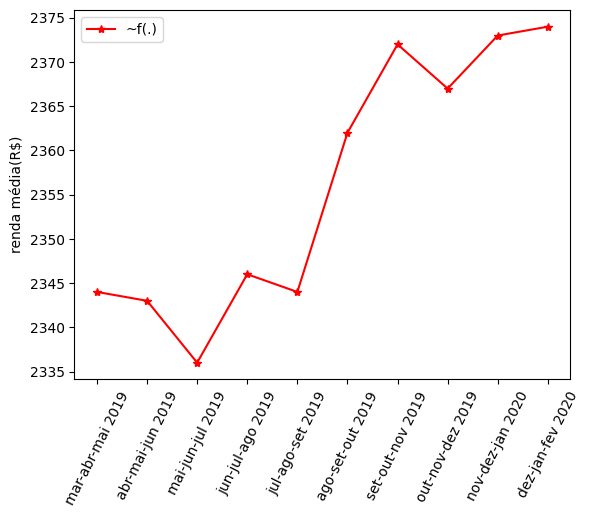

In [6]:
from read_series import ReadSeries
from matplotlib import pyplot as plt
import numpy as np

def config_plt():
    fig, ax = plt.subplots()
    #rotacionar os label do eixo x (datas)
    for label in ax.get_xticklabels():
        label.set_rotation(90*(-180/np.pi)+180)
        
    plt.ylabel('renda média(R$)')

        
data = []
time = []
rs = ReadSeries()
rs.read_income_csv(data, time)

_data = data[86:96]
_timeLabel = time[86:96]
_time = [i for i in range(len(_timeLabel))]

_timePstring = time[96:]
_timePredict = [i for i in range(len(_timeLabel) , len(_timeLabel)+len(_timePstring))]


config_plt()

plt.plot(_timeLabel, _data, 'r-*')
plt.legend(['~f(.)'], loc=2)

In [10]:
import pandas as pd

In [127]:
df = pd.read_csv('data/renda_Brasil_2012_2020.csv',sep=';')
df = df.drop(df.columns[[0]],axis=1)
df = df.T
df = df.set_axis(['time', 'data'], axis=1)
df = df.reset_index(drop=True)
df

,time,data
0,jan-fev-mar 2012,2220
1,fev-mar-abr 2012,2231
2,mar-abr-mai 2012,2224
3,abr-mai-jun 2012,2228
4,mai-jun-jul 2012,2240
...,...,...
94,nov-dez-jan 2020,2373
95,dez-jan-fev 2020,2374
96,jan-fev-mar 2020,2393
97,fev-mar-abr 2020,2420


C:\Users\ingridf\AppData\Local\Temp\ipykernel_9660\744424605.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([time[0]])


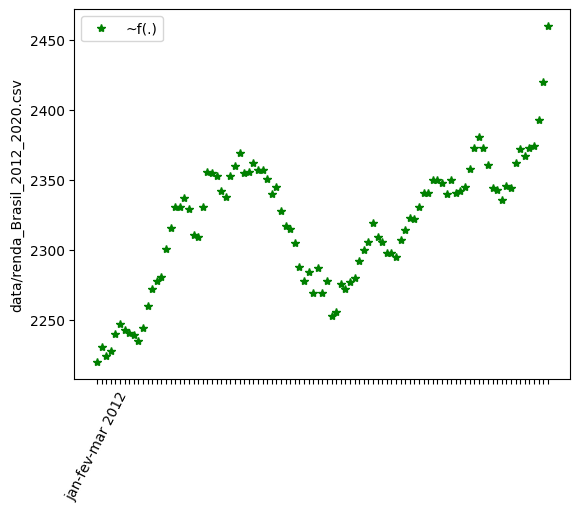

In [104]:
def config_plt_2():
    fig, ax = plt.subplots()
    #rotacionar os label do eixo x (datas)
    for label in ax.get_xticklabels():
        label.set_rotation(90*(-180/np.pi)+180)
        
    plt.ylabel('data/renda_Brasil_2012_2020.csv')

        
data = []
time = []
rs = ReadSeries()
rs.read_income_csv(data, time)

_data = data[0:99]
_timeLabel = time[0:99]
_time = [i for i in range(len(_timeLabel))]

_timePstring = time[96:]
_timePredict = [i for i in range(len(_timeLabel) , len(_timeLabel)+len(_timePstring))]


config_plt_2()
plt.gca().set_xticklabels([time[0]])
plt.ylabel
plt.plot(_timeLabel, _data, 'g*')
plt.legend(['~f(.)'], loc=2)

**Atividade 2:**

Implemente o algoritmo de Regressão Linear que retorne o vetor de pesos $w=(X^TX)^{-1}X^Ty$

In [58]:
class LinearRegression:
    def fit(self, _X, _y): # _X - features ; _y - targets
        X = np.concatenate((np.ones((_X.shape[0], 1)), _X), axis=1) # termo independente (vetor de uns adicionada à matriz)
        y = _y.reshape(-1, 1) # redimensionando y para a multiplicação entre as matrizes (ordem)
        self.w = np.linalg.inv(X.T @ X) @ X.T @ y # regressão linear (mínimos quadrados)

    def predict(self, _x): # _x features
        x = np.array([1] + list(_x))  
        return x @ self.w
    
    def getW(self):
        return self.w

In [78]:
X = df
y = _time

model = LinearRegression()
model.fit(X, y)

# Faz previsões
x_novo = [2, 3]
previsao = model.predict(x_novo)
print(f"Previsão para {x_novo}: {previsao}")

# Obtém os pesos
w = model.getW()
print(f"Vetor de pesos w: {w}")

AttributeError: 'list' object has no attribute 'reshape'

**Atividade 3:** 

1. Utilize o algoritmo de Regressão Linear para computar a função hipotese $h(x)=w^Tx$ e plote a mesma no gráfico de dispersão;
2. Faça a previsão de 3 novos meses futuros e exiba esta previsão no gráfico.

In [ ]:
_timeRL = [[1, t] for t in _time]

lr = LinearRegression()
lr.fit(_timeRL, _data)

_dataRL = lr.predict(_timeRL)

_timeLabelForecast = time[96:]
_timeForecast = [i for i in range(len(_timeLabel), len(_timeLabel) + len(_timeLabelForecast))]
_dataForecast = lr.predict([[1, t] for t in _timeForecast])




config_plt()
    
plt.plot(_timeLabel, _data, 'r-*')
plt.plot(_timeLabel, _dataRL, 'k--')
plt.plot(_timeLabelForecast, _dataForecast, 'b*')

plt.legend(['~f(.)', 'h(.)', 'previsão'], loc=2)

**Atividade 4:**

Reproduza o mesmo experimento utilizando a classe *LinearRegression* do pacote *sklearn*

*from sklearn.linear_model import LinearRegression*


In [ ]:
from sklearn.linear_model import LinearRegression

